In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [7]:
file_path = r"C:\Users\Nikhi\Churn-Prediction(SQL-BI-PY-ML)\Prediction_Data.xlsx"
sheet_name = 'vw_ChurnData'

df = pd.read_excel(file_path, sheet_name=sheet_name)
df.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11850-MAH,Male,74,Yes,Maharashtra,5,6,NaN,Yes,Yes,...,Credit Card,75.150002,3480.350098,0.0,0,422.549988,3902.899902,Stayed,Others,Others
1,11873-HAR,Male,45,Yes,Haryana,9,10,Deal 2,Yes,No,...,Credit Card,50.250000,2221.550049,0.0,0,292.049988,2513.600098,Stayed,Others,Others
2,11878-RAJ,Male,75,Yes,Rajasthan,15,17,NaN,Yes,No,...,Bank Withdrawal,71.800003,1167.800049,0.0,0,734.400024,1902.199951,Churned,Competitor,Competitor offered more data
3,11882-BIH,Female,74,No,Bihar,14,15,Deal 5,Yes,No,...,Bank Withdrawal,78.949997,378.399994,0.0,0,61.349998,439.750000,Churned,Attitude,Attitude of support person
4,11887-MAD,Female,33,No,Madhya Pradesh,2,33,Deal 2,Yes,No,...,Credit Card,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,Stayed,Others,Others


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6007 entries, 0 to 6006
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  6007 non-null   object 
 1   Gender                       6007 non-null   object 
 2   Age                          6007 non-null   int64  
 3   Married                      6007 non-null   object 
 4   State                        6007 non-null   object 
 5   Number_of_Referrals          6007 non-null   int64  
 6   Tenure_in_Months             6007 non-null   int64  
 7   Value_Deal                   2710 non-null   object 
 8   Phone_Service                6007 non-null   object 
 9   Multiple_Lines               6007 non-null   object 
 10  Internet_Service             6007 non-null   object 
 11  Internet_Type                4784 non-null   object 
 12  Online_Security              6007 non-null   object 
 13  Online_Backup     

In [15]:
df = df.drop(['Customer_ID','Churn_Category','Churn_Reason'],axis=1)

cols_to_encode = ['Gender','Married','State','Value_Deal','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type',
                  'Online_Security','Online_Backup','Device_Protection_Plan','Premium_Support','Streaming_TV','Streaming_Movies',
                  'Streaming_Music','Unlimited_Data','Contract','Paperless_Billing','Payment_Method']

In [17]:
label_encode = {}
for col in cols_to_encode:
    label_encode[col] = LabelEncoder()
    df[col] = label_encode[col].fit_transform(df[col])

In [21]:
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,1,74,1,12,5,6,5,1,1,1,...,2,0,1,75.150002,3480.350098,0.0,0,422.549988,3902.899902,Stayed
1,1,45,1,6,9,10,1,1,0,1,...,0,1,1,50.250000,2221.550049,0.0,0,292.049988,2513.600098,Stayed
2,1,75,1,16,15,17,5,1,0,1,...,0,1,0,71.800003,1167.800049,0.0,0,734.400024,1902.199951,Churned
3,0,74,0,2,14,15,4,1,0,1,...,0,0,0,78.949997,378.399994,0.0,0,61.349998,439.750000,Churned
4,0,33,0,11,2,33,1,1,0,1,...,0,1,1,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,Stayed


In [41]:
df['Customer_Status'].value_counts(normalize=True)

Customer_Status
0    0.71167
1    0.28833
Name: proportion, dtype: float64

In [29]:
df['Customer_Status'] = df['Customer_Status'].map({'Stayed':0,'Churned':1})
df.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,1,74,1,12,5,6,5,1,1,1,...,2,0,1,75.150002,3480.350098,0.0,0,422.549988,3902.899902,0
1,1,45,1,6,9,10,1,1,0,1,...,0,1,1,50.250000,2221.550049,0.0,0,292.049988,2513.600098,0
2,1,75,1,16,15,17,5,1,0,1,...,0,1,0,71.800003,1167.800049,0.0,0,734.400024,1902.199951,1
3,0,74,0,2,14,15,4,1,0,1,...,0,0,0,78.949997,378.399994,0.0,0,61.349998,439.750000,1
4,0,33,0,11,2,33,1,1,0,1,...,0,1,1,69.099998,3168.000000,0.0,0,1466.479980,4634.479980,0


In [160]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print(X_train.shape, y_train.shape)

(4204, 28) (4204,)


In [162]:
rf = RandomForestClassifier(n_estimators=100, random_state=2)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('accuracy :', accuracy_score(y_test, y_pred))
print('\nconfusion_matrix :')
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

accuracy : 0.8535773710482529

confusion_matrix :
[[1202   90]
 [ 174  337]]

Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1292
           1       0.79      0.66      0.72       511

    accuracy                           0.85      1803
   macro avg       0.83      0.79      0.81      1803
weighted avg       0.85      0.85      0.85      1803



In [73]:
importance = rf.feature_importances_

indices = np.argsort(importance)[::-1]

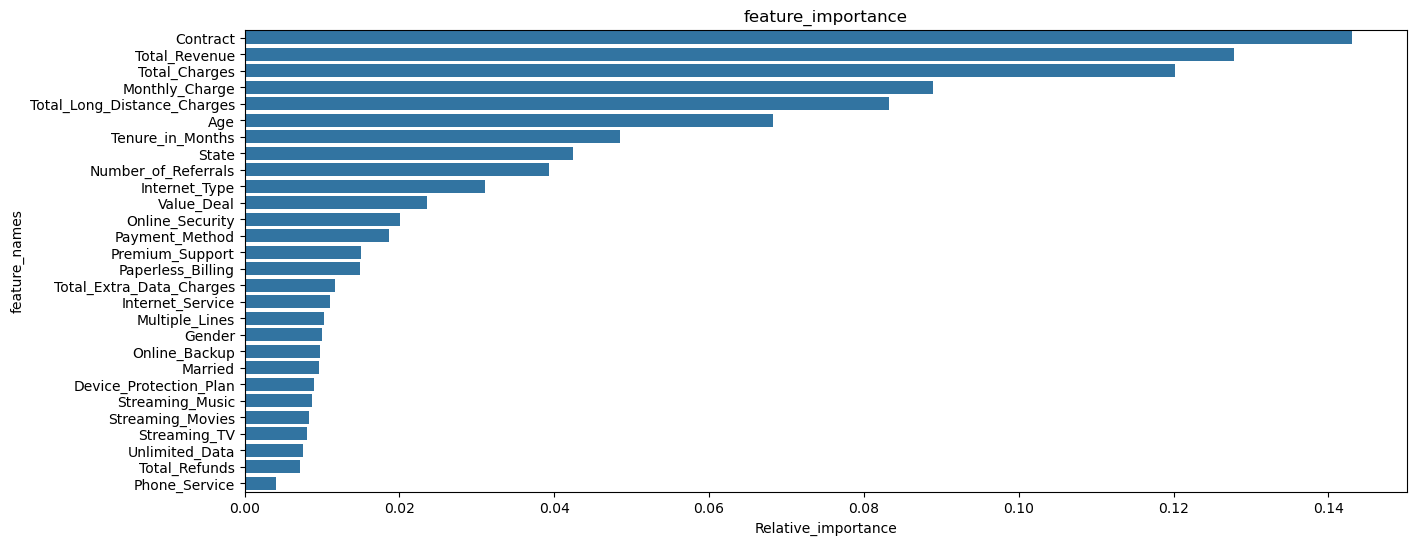

In [97]:
plt.figure(figsize=(15,6))
sns.barplot(x = importance[indices], y = X.columns[indices])
plt.title('feature_importance')
plt.xlabel('Relative_importance')
plt.ylabel('feature_names')
plt.show()

In [133]:
#trying to fietune model by removing unimportant features

In [105]:
threshold = 0.01 

important_features = X.columns[importance >= threshold] 
unimportant_features = X.columns[importance < threshold]

print("Important features (above threshold):") 
print(important_features) 
print("\nUnimportant features (below threshold):") 
print(unimportant_features)

Important features (above threshold):
Index(['Age', 'State', 'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Premium_Support', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue'],
      dtype='object')

Unimportant features (below threshold):
Index(['Gender', 'Married', 'Phone_Service', 'Online_Backup',
       'Device_Protection_Plan', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Total_Refunds'],
      dtype='object')


In [ ]:
new_df = df.copy()

In [129]:
new_df = new_df.drop(['Gender', 'Married','Phone_Service', 'Online_Backup','Device_Protection_Plan', 'Streaming_TV', 'Streaming_Movies','Streaming_Music', 'Unlimited_Data', 'Total_Refunds'], axis=1)

X = new_df.iloc[:,:-1]
y = new_df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)
print(X_train.shape, y_train.shape)

(4204, 18) (4204,)


In [131]:
rf = RandomForestClassifier(n_estimators=100, random_state=2)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('accuracy :', accuracy_score(y_test, y_pred))
print('\nconfusion_matrix :')
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

accuracy : 0.8546866333887965

confusion_matrix :
[[1207   85]
 [ 177  334]]

Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1292
           1       0.80      0.65      0.72       511

    accuracy                           0.85      1803
   macro avg       0.83      0.79      0.81      1803
weighted avg       0.85      0.85      0.85      1803



Model for Prediction on New Data

In [154]:
df1 = pd.read_excel(file_path, sheet_name='vw_JoinData')

og_data = df1.copy()
customer_ids = df1['Customer_ID']

df1.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,13744-AND,Female,41,Yes,Andhra Pradesh,8,3,Deal 5,Yes,No,...,Bank Withdrawal,19.650000,19.650000,0.0,0,13.85,33.500000,Joined,Others,Others
1,13823-TEL,Female,31,Yes,Telangana,1,28,Deal 5,No,No,...,Bank Withdrawal,24.500000,46.400002,0.0,0,0.00,46.400002,Joined,Others,Others
2,13946-HAR,Female,41,Yes,Haryana,1,3,Deal 5,Yes,No,...,Credit Card,19.650000,19.650000,0.0,0,23.67,43.320000,Joined,Others,Others
3,14567-TAM,Male,43,No,Tamil Nadu,1,9,NaN,Yes,No,...,Credit Card,20.350000,20.350000,0.0,0,44.09,64.440002,Joined,Others,Others
4,16244-UTT,Female,19,Yes,Uttar Pradesh,5,7,NaN,Yes,No,...,Credit Card,19.549999,19.549999,0.0,0,5.10,24.650000,Joined,Others,Others


In [156]:
df1 = df1.drop(['Customer_ID','Churn_Category','Churn_Reason','Customer_Status'],axis=1)

for col in df1.columns:
    if df1[col].dtype == 'object':
        df1[col] = label_encode[col].transform(df1[col])

df1.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,Internet_Service,...,Unlimited_Data,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue
0,0,41,1,0,8,3,4,1,0,0,...,0,0,1,0,19.650000,19.650000,0.0,0,13.85,33.500000
1,0,31,1,18,1,28,4,0,0,1,...,1,0,0,0,24.500000,46.400002,0.0,0,0.00,46.400002
2,0,41,1,6,1,3,4,1,0,0,...,0,0,0,1,19.650000,19.650000,0.0,0,23.67,43.320000
3,1,43,0,17,1,9,5,1,0,0,...,0,0,0,1,20.350000,20.350000,0.0,0,44.09,64.440002
4,0,19,1,19,5,7,5,1,0,0,...,0,0,0,1,19.549999,19.549999,0.0,0,5.10,24.650000


In [166]:
predictions = rf.predict(df1)
og_data['CustomerStatus_Predicted'] = predictions

In [172]:
og_data = og_data[og_data['CustomerStatus_Predicted']==1]
og_data.to_csv(r'C:\Users\Nikhi\Churn-Prediction(SQL-BI-PY-ML)', index=False)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,CustomerStatus_Predicted
0,13744-AND,Female,41,Yes,Andhra Pradesh,8,3,Deal 5,Yes,No,...,19.650000,19.650000,0.0,0,13.850000,33.500000,Joined,Others,Others,1
1,13823-TEL,Female,31,Yes,Telangana,1,28,Deal 5,No,No,...,24.500000,46.400002,0.0,0,0.000000,46.400002,Joined,Others,Others,1
2,13946-HAR,Female,41,Yes,Haryana,1,3,Deal 5,Yes,No,...,19.650000,19.650000,0.0,0,23.670000,43.320000,Joined,Others,Others,1
3,14567-TAM,Male,43,No,Tamil Nadu,1,9,NaN,Yes,No,...,20.350000,20.350000,0.0,0,44.090000,64.440002,Joined,Others,Others,1
4,16244-UTT,Female,19,Yes,Uttar Pradesh,5,7,NaN,Yes,No,...,19.549999,19.549999,0.0,0,5.100000,24.650000,Joined,Others,Others,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,99515-ASS,Male,34,No,Assam,11,11,NaN,Yes,Yes,...,65.250000,209.899994,0.0,0,128.039993,337.940002,Joined,Others,Others,1
407,97828-MAH,Female,57,No,Maharashtra,0,12,Deal 5,Yes,No,...,92.000000,266.799988,0.0,0,46.799999,313.600006,Joined,Others,Others,1
408,99855-MAH,Female,50,Yes,Maharashtra,5,29,NaN,Yes,No,...,69.699997,135.199997,0.0,0,31.340000,166.539993,Joined,Others,Others,1
409,99862-BIH,Female,30,No,Bihar,12,9,Deal 5,Yes,No,...,74.000000,74.000000,0.0,0,23.700001,97.699997,Joined,Others,Others,1
